# 📘 Impedance and Phase Plot from DATS Export

This notebook reads a text file exported from the Dayton Audio Test System (DATS) and plots impedance and phase versus frequency. 
The impedance is plotted on the left Y-axis, and the phase (dotted line) is plotted on the right Y-axis.

In [76]:
import matplotlib.pyplot as plt
y_lims = [0, 80]
x_lims = [50, 150]

In [77]:
# Define multiple file paths
file_paths = [
    "input_data/HaptiCouplerDamping1.txt",
    "input_data/HaptiCouplerDamping2.txt",
    "input_data/HaptiCouplerDamping5.txt",
    "input_data/HaptiCouplerDamping4.txt",
    "input_data/HaptiCouplerDamping3.txt"
]

all_data = []

for file_path in file_paths:
    frequencies = []
    impedances = []
    phases = []
    data_section = False

    with open(file_path, 'r') as file:
        for line in file:
            if line.strip().startswith("Freq"):
                data_section = True
                continue
            if data_section:
                try:
                    parts = line.strip().split()
                    if len(parts) >= 3:
                        frequencies.append(float(parts[0]))
                        impedances.append(float(parts[1]))
                        phases.append(float(parts[2]))
                except ValueError:
                    continue

    all_data.append({
        "file": file_path,
        "frequencies": frequencies,
        "impedances": impedances,
        "phases": phases
    })


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


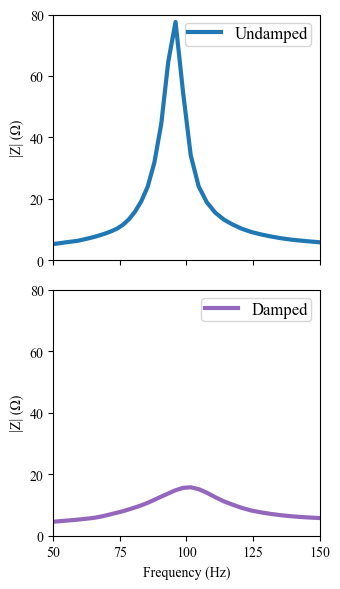

In [95]:
import matplotlib as mpl


line_width = 3

# Set Times New Roman as the default font
mpl.rcParams['font.family'] = 'Times New Roman'

# Create figure and axis
#fig, ax1 = plt.subplots(figsize=(3.5, 2))
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(3.5, 6), sharex=True)

# Define colormap for consistent colors
colors = plt.cm.tab10.colors

#plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)


labels = ["Undamped", "Light","Blank", "Moderate", "Full"]
labels2 = ["Damped", "Light","Blank", "Moderate", "Full"]
# Plot impedance for each file
data_index = 0
data = all_data[data_index]
ax1.plot(
    data["frequencies"], data["impedances"], linewidth=line_width,
    color=colors[data_index % len(colors)],
    label=labels[data_index]#f'Impedance ({data["file"]})'
)

#ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('|Z| (Ω)')#'Impedance Magnitude (Ω)')#, color='tab:blue')
#ax1.set_xscale('log')
ax1.tick_params(axis='y')#, labelcolor='tab:blue')
ax1.yaxis.set_major_locator(plt.MaxNLocator(4))
ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
ax1.set_ylim(y_lims)
ax1.set_xlim(x_lims)
ax1.grid(False)#, which='both', axis='both', linestyle='--', linewidth=0.5)




data_index = 4
data = all_data[data_index]
ax2.plot(
    data["frequencies"], data["impedances"], linewidth=line_width,
    color=colors[data_index % len(colors)],
    label=labels[data_index]#f'Impedance ({data["file"]})'
)

ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('|Z| (Ω)')#'Impedance Magnitude (Ω)')#, color='tab:blue')
#ax2.set_xscale('log')
ax2.tick_params(axis='y')#, labelcolor='tab:blue')
ax2.yaxis.set_major_locator(plt.MaxNLocator(4))
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))
ax2.set_ylim(y_lims)
ax2.set_xlim(x_lims)
ax2.grid(False)#, which='both', axis='both', linestyle='--', linewidth=0.5)




# Combine legends from both axes
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='best',labelspacing=0.2,borderpad=0.2,fontsize='large')

lines_labels = [ax.get_legend_handles_labels() for ax in [ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax2.legend(lines, labels2, loc='best',labelspacing=0.2,borderpad=0.2,fontsize='large')

fig.tight_layout()
fig.subplots_adjust(hspace=0.12)

# Save the figure
plt.savefig('outputs/impedance_phase_plot_damped_undamped.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


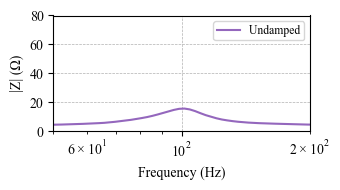

In [40]:
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(3.5, 2))

# Define colormap for consistent colors
colors = plt.cm.tab10.colors


labels = ["None", "Light","Blank", "Moderate", "Undamped"]
# Plot impedance for each file
data_index = 4
data = all_data[data_index]
ax1.plot(
    data["frequencies"], data["impedances"],
    color=colors[data_index % len(colors)],
    label=labels[data_index]#f'Impedance ({data["file"]})'
)

ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('|Z| (Ω)')#'Impedance Magnitude (Ω)')#, color='tab:blue')
ax1.set_xscale('log')
ax1.tick_params(axis='y')#, labelcolor='tab:blue')
ax1.yaxis.set_major_locator(plt.MaxNLocator(4))
ax1.set_ylim(y_lims)
ax1.set_xlim(x_lims)
plt.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5)



# Combine legends from both axes
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='best',labelspacing=0.2,borderpad=0.3,fontsize='small')

fig.tight_layout()

# Save the figure
plt.savefig('outputs/impedance_phase_plot_damped_small.eps', format='eps')
plt.show()